### 지도학습 - knn

* 지도학습은 대표적인 머신러닝 방법론 중 하나이다.
* 지도학습은 입력과 출력 샘플 데이터가 있고, 주어진 입력으로부터 출력을 예측하고자 할 때 사용한다.
* 지도학습에는 분류(classification)와 회귀(regression)가 있다.
* knn은 사용자가 쉽게 이해할 수 있는 대표적인 지도학습 방법 중 하나로, 분류와 회귀에 다 사용된다.

In [1]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system()== "Darwin":
    rc('font', family = 'AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

### 지도학습의 종류

### 분류(Classification)
* 분류는 가능성 있는 여러 클래스 레이블(class label)중 하나를 예측하는 것이다.
* 분류는 두개의 클래스로 분류하는 **이진 분류(binary classification)**과 셋 이상의 클래스로 분류하는 **다중 분류(multiclass classification)**로 나누어진다.
* 이진 분류는 질문의 답이 예/아니오 등의 예. 이진분류의 양성(positive) 클래스, 음성(negative) 클래스라고 한다.

### 회귀(Regression)
* 회귀는 연속적인 숫자, 또는 프로그래밍 용어로 말하면 부동소수점수(수학 용어로는 실수)를 예측하는 것. 수치형 데이터를 예측.
* 예로는 어떤 사람의 나이, 키, 몸무게 정해진 수의 값이 아닌 해당 예측 값은 수치형 데이터.

### knn 알고리즘 시각화
* install library : !pip install mglearn

In [2]:
# !pip install mglearn

In [3]:
import mglearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

### knn의 k가 3인 경우의 알고리즘(분류 - 범주형 값의 예측)

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


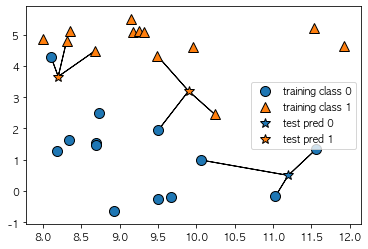

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors = 3)

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


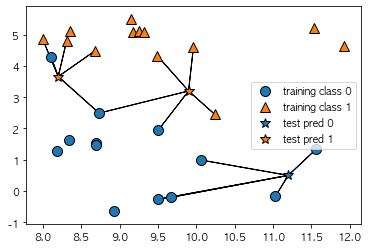

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors = 5)

### knn의 k가 1인 경우의 알고리즘(회귀 - 수치형 값의 예측)

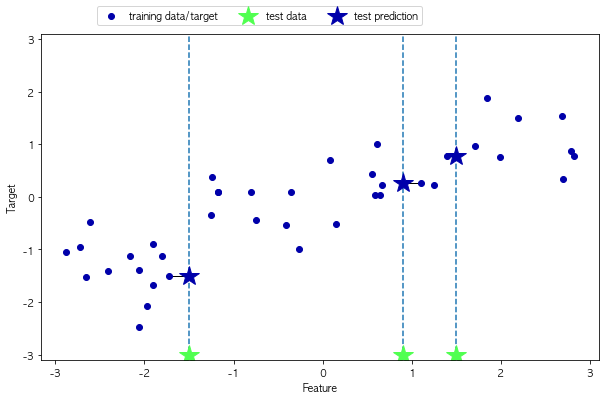

In [6]:
mglearn.plots.plot_knn_regression(n_neighbors = 1)

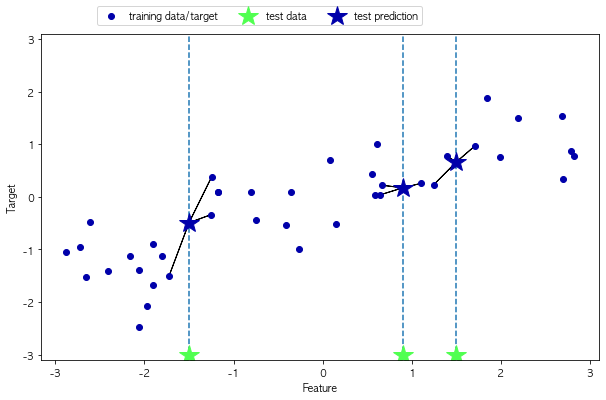

In [7]:
mglearn.plots.plot_knn_regression(n_neighbors = 3)

### 하이퍼 파라미터 k에 따른 결정경계
* k의 값에 따른 어디로 분류가 되는지에 대한 결정 경계를 보여준다.

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### 데이터 준비 및 나누기

In [9]:
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

/Users/seungwoomun/opt/anaconda3/envs/likelion/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


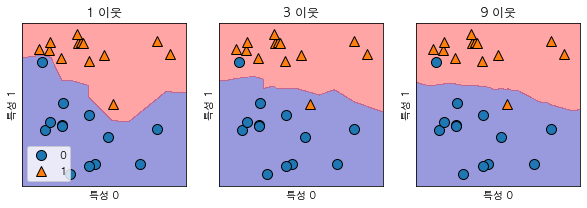

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes) :
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = .4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax = ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc = 3)

### 일반화, 과대적합, 과소적합
* 모델이 처음보는 데이터에 대해 예측이 가능하다면 이를 훈련세트에서 테스트 세트로 일반화(generalization)되었다고 한다.
* 아주 복잡한 모델을 만든다면 훈련세트에만 정확한 모델이 된다.(과대적합)
    * 과대적합(overfitting)는 모델이 훈련 세트의 각 샘플에 너무 가깝게 맞춰져서 새로운 데이터가 일반화되기 어려울 때 발생.
* 반대로 모델이 너무 간단해서 잘 예측을 못함.(과소적합-underfitting)

### 유방암 데이터 셋 실습
* 데이터 셋 : 위스콘신 유방암(Wisconsin Breast Cancer)데이터 셋
* 각 종양은 악성(malignant-암 종양), 양성(benign-해롭지 않은 종양)

In [12]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [14]:
cancer = load_breast_cancer()
print("cancer.keys() : \n{}".format(cancer.keys()))
print("유방암 데이터의 행열 : {}".format(cancer.data.shape))

cancer.keys() : 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
유방암 데이터의 행열 : (569, 30)


### feature, class 이름

In [15]:
print("특성이름(featuer_names) : {}".format(cancer['feature_names']))
print("유방암 데이터의 형태 : ", cancer.data.shape)
print()
print("클래스 이름(target_names) : {}".format(cancer['target_names']))
print("클래스별 샘플 개수 : \n",np.bincount(cancer.target))

특성이름(featuer_names) : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
유방암 데이터의 형태 :  (569, 30)

클래스 이름(target_names) : ['malignant' 'benign']
클래스별 샘플 개수 : 
 [212 357]
